# Time Series Forecasting project

### Built a model to Forecast monthly sales of  Sparkling Wine for certain Wine Estate for the next 12 month

### Packages Used:

In [1]:
# General
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
sns.set()
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from sklearn.metrics import  mean_squared_error
from sklearn import metrics
from datetime import datetime
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
from pandas  import  Grouper, concat
import calendar
import  statsmodels.api as  sm
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7

## Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [4]:
os.getcwd()

'C:\\Users\\msair\\JUPYTER NOTES'

In [5]:
os.chdir("C:\\Users\\msair\\Downloads")

In [6]:
spark_df = pd.read_csv("Sparkling.csv")

In [7]:
print('First 5 rows of Data')
spark_df.head()

First 5 rows of Data


,YearMonth,Sparkling
0,1980-01,1686
1,1980-02,1591
2,1980-03,2304
3,1980-04,1712
4,1980-05,1471


In [8]:
print('Last 5 rows of Data')
spark_df.tail()

Last 5 rows of Data


,YearMonth,Sparkling
182,1995-03,1897
183,1995-04,1862
184,1995-05,1670
185,1995-06,1688
186,1995-07,2031


In [9]:
print("The number of rows: ",spark_df.shape[0], "\n""The number of columns: ",spark_df.shape[1])

The number of rows:  187 
The number of columns:  2


### Lets check the data type of different variables present in dataset.

In [10]:
spark_df.dtypes

YearMonth    object
Sparkling     int64
dtype: object

## 1. Read the data as an appropriate Time Series data and plot the data.

**Creating the Time Stamps and adding to the data frame to make it a Time Series Data**

In [11]:
date = pd.date_range(start='1/1/1980', end='1/1/1996', freq='M')

In [12]:
spark_df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])

In [13]:
spark = spark_df.set_index('Time_Stamp')
spark.drop(['YearMonth'], axis=1, inplace=True)
spark.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


### Plotting the Rose Time Series:


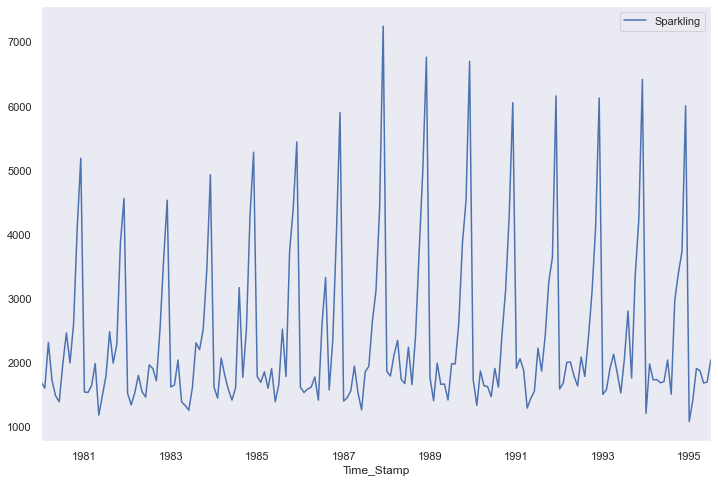

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8
spark.plot()
plt.grid();

Assume we are forecasting the Sparkling for the next few months. We will look at previous sales values and try to gauge and extract a pattern. In this case, we see a pattern within each year that indicates a seasonal effect. "These observations will aid us in forecasting future values. Please keep in mind that we only used one variable, Sparkling (Sparkling sales of past 15 years ). As a result, this is a univariate Time series Analysis/Forecasting. A trend may be absent, but a seasonal effect appears to be present. This can be deduced from the plot.

Although there appears to be no trend, seasonality can be seen here.

## 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

**Check the basic measures of descriptive statistics**

In [15]:
spark.describe()

,Sparkling
count,187.000000
mean,2402.417112
std,1295.111540
min,1070.000000
25%,1605.000000
50%,1874.000000
75%,2549.000000
max,7242.000000


The mean value is 2402.41 ,median is 1874 and the range value comes to be 6171

In [16]:
print('We have around',187/12,'year of data.')

We have around 15.583333333333334 year of data.


In [17]:
spark.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


### Checking for Null values:


In [18]:
print('The number of Null values in Rose dataset:')
print(spark.isnull().sum())

The number of Null values in Rose dataset:
Sparkling    0
dtype: int64


There are 187 data points ,with no missing values and 'Sparkling' is variables is of integer datatype.

## Univariate Time Series Analysis

A univariate time series is a series with single-time stamped variable at time t . Here the dataset belongs to the Sparkling Wine sales from the January of 1980 to July of 1995 .Here Sparkling wine is time -dependent variable. The series is a monthly series ,wherein for each month between Jan -1980 and July -1995 a datapoint is recorded.

**Plot a boxplot to understand the spread of accidents across different years and within different months across years.**

**Yearly Boxplot**

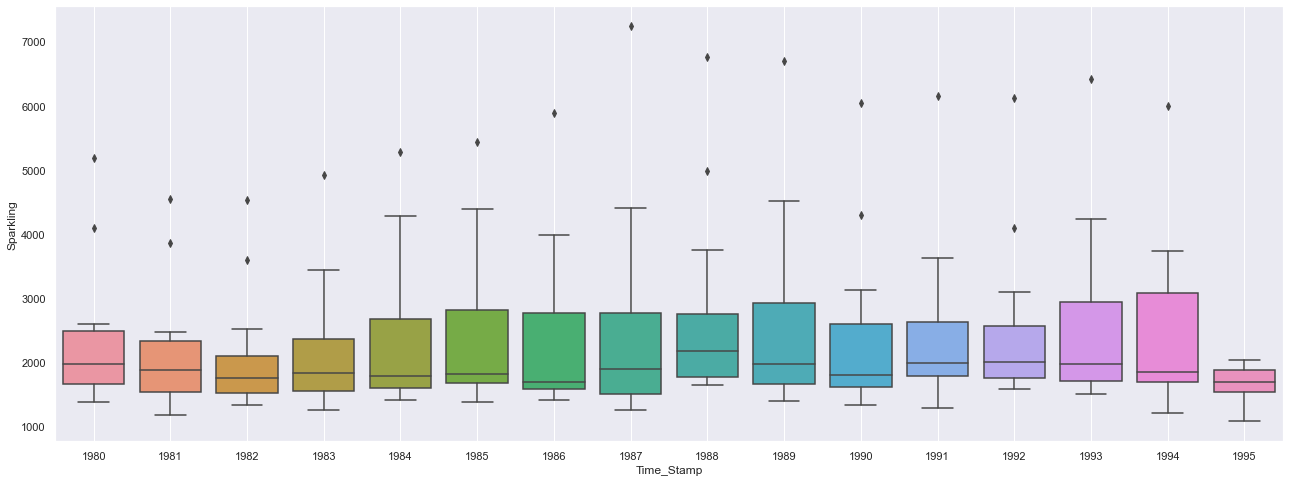

In [19]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = spark.index.year,y = spark['Sparkling'],)
plt.grid();

* Across the year ,there are not much noticeable difference,though there are few high ranges in middle years .Also the last year is showing less sale due to the fact that the data is recorded for 7 out of 12 months in year 1995


**Monthly Plot**

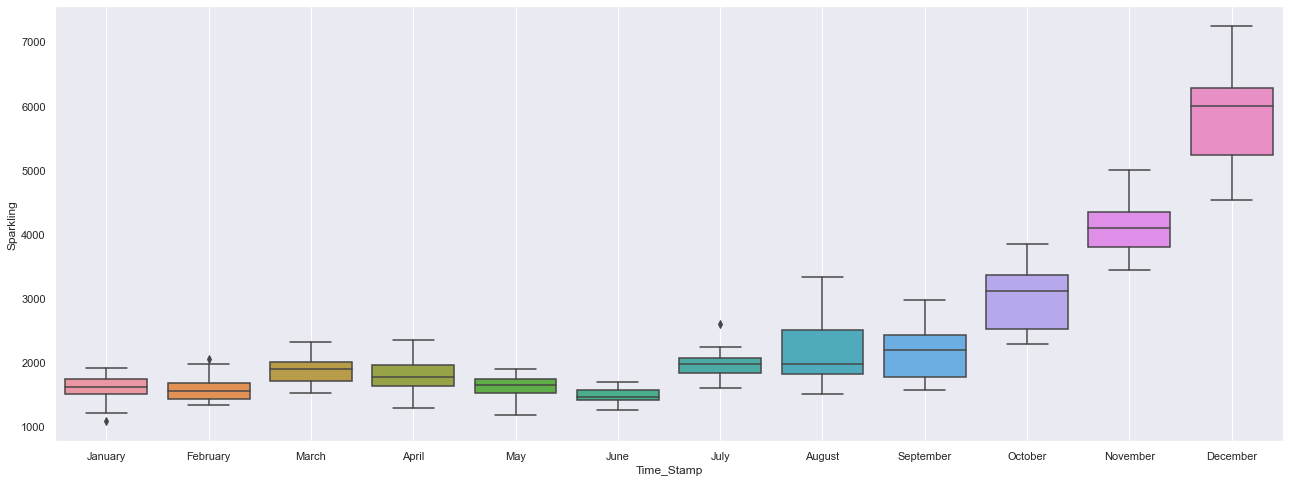

In [20]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = spark.index.month_name(),y = spark['Sparkling'])
plt.grid();

* The months of November and December have the highest sales. These fluctuations can be attributed to the month or months being a holiday month. The minimum sale is shown in June. Remember that there was one fewer observation for a few months in 1995. With a 12-month cycle, we can see a seasonal effect.

* There is a clear distinction in 'Sparkling wine sales' across different months and years. Inferences: Sparkling wine sales have increased year after year during the winter season. December is the peak month for Sparkling Wine sales, and the variance and mean value are much higher than in any other month. A seasonal effect can be seen with a cycle of 12 months

**Plot a graph of monthly Sales across years.**


In [21]:
monthly_sales_across_years_spark = pd.pivot_table(pd.DataFrame(spark), columns = spark.index.month, 
                                                      index = spark.index.year)
monthly_sales_across_years_spark


Sparkling                                                          \
Time_Stamp        1       2       3       4       5       6       7       8    
Time_Stamp                                                                     
1980          1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981          1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982          1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983          1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984          1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985          1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986          1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987          1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988          1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989          1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990          1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991          1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992          1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993          1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994          1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995          1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

                                            
Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

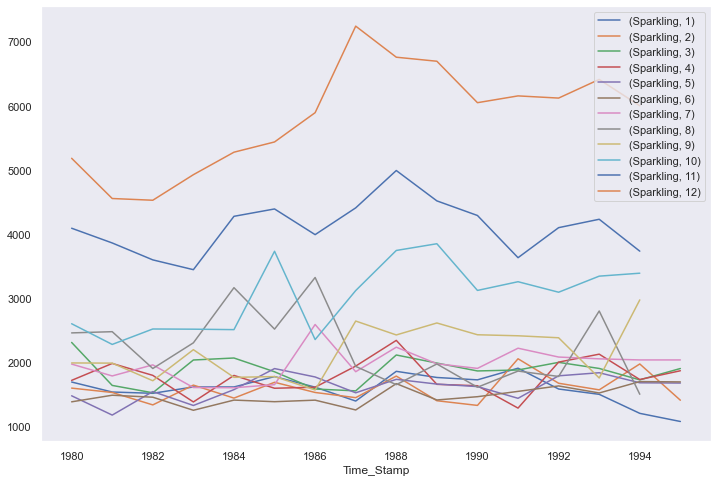

In [22]:
monthly_sales_across_years_spark.plot()
plt.grid()
plt.legend(loc='best');

From the graph also, we can conclude that December has the highest sales across years.

As previously seen Month of December is outperforming for almost everyyear and it is another indicator that there is high out of seasonal sale in Oct-Dec.

In [23]:
df_yearly_sum = spark.resample('A').sum()
df_yearly_sum.head()

,Sparkling
Time_Stamp,
1980-12-31,28406
1981-12-31,26227
1982-12-31,25321
1983-12-31,26180
1984-12-31,28431


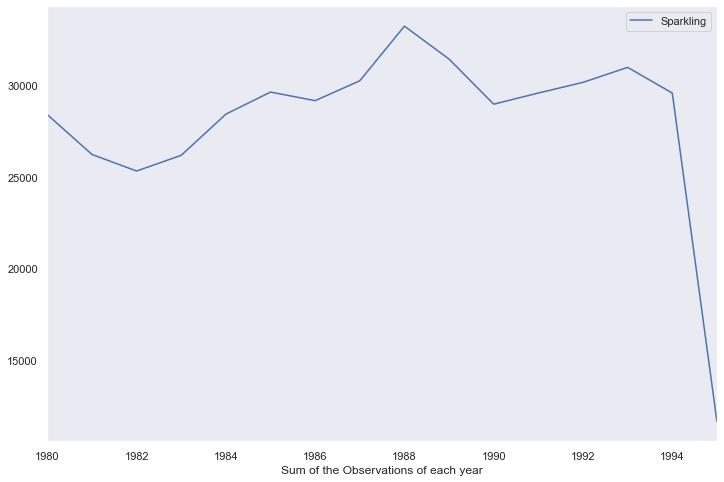

In [24]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

* This particular graph tells us what percentage of data points refer to what number of Sales.

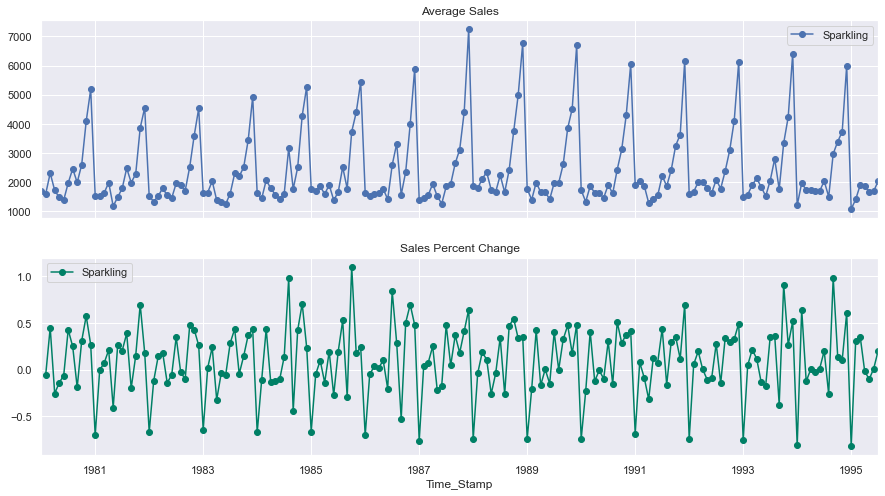

In [25]:
# group by date and get average Sales, and precent change
average    = spark.groupby(spark.index).mean()
pct_change = spark.groupby(spark.index).sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average Sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sales Percent Change",grid=True)

* The above two graphs tells us the Average ' Sparkling Sales' and the Percentage change of 'Sparkling Sales' with respect to the time.It shows lot of seasonal variation every year 


In [26]:
df_daily_sum = spark.resample('D').sum()
df_daily_sum

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-01,0
1980-02-02,0
1980-02-03,0
1980-02-04,0
...,...
1995-07-27,0
1995-07-28,0
1995-07-29,0


**Decompose the Time Series and plot the different components.**

In [27]:
import statsmodels.api as sm

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Additive Decomposition (Sparkling Wine)**

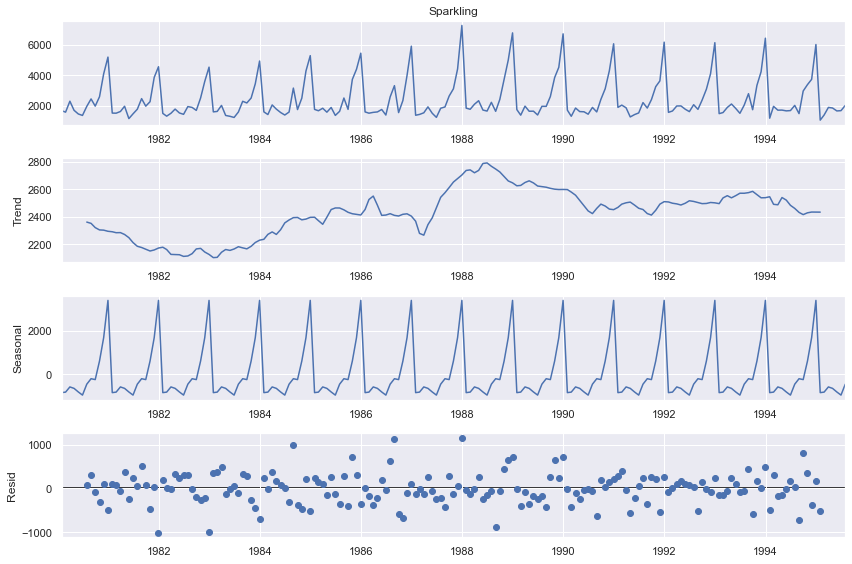

In [29]:
decomposition_a = seasonal_decompose(spark['Sparkling'],model='additive')
decomposition_a.plot();

In [30]:
trend = decomposition_a.trend
seasonality = decomposition_a.seasonal
residual = decomposition_a.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

**Multiplicative Decomposition-(Sparkling Wine)**

A multiplicative model suggest that the components are multiplied together . A multiplicative model is non-linear The seasonal correction is multiplied with the trend. A non-linear seasonality has an increasing or decreasing frequency (widh of cycles ) and or amplitude (height of the cycles) over time.

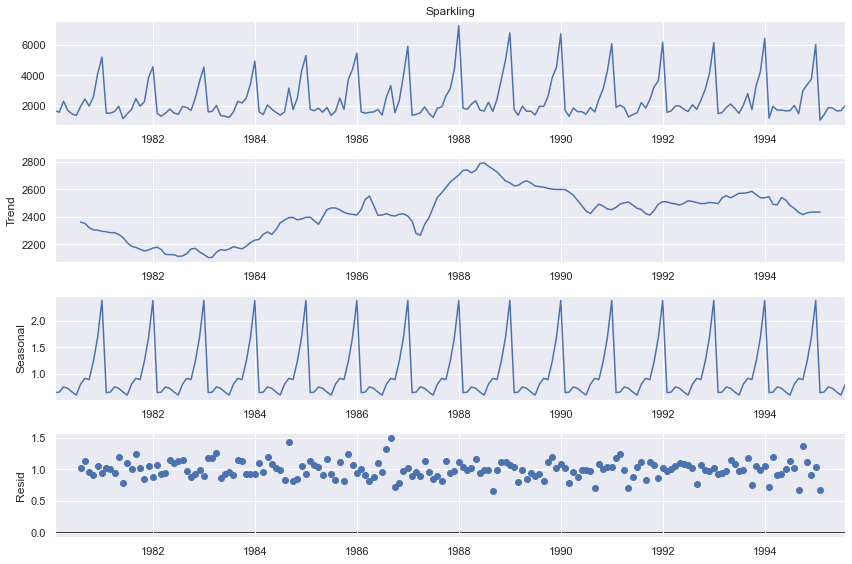

In [31]:
decomposition_m = seasonal_decompose(spark['Sparkling'],model='multiplicative')
decomposition_m.plot();
# For the multiplicative series, we see that a lot of residuals are located around 1.

In [32]:
trend = decomposition_m.trend
seasonality = decomposition_m.seasonal
residual = decomposition_m.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

* Closer look at the trend in data set There is an upward trend in the initial half which seems to be reach at a peak and then move in downward position.This will help in the forecast as in the most recent time it seems to have downward trend.

Inference:

Hence we can say sparking wine time series show additive decomposition as errors patterns are almost similar to additive decomposition .


In [33]:
deaseasonalized_ts = trend + residual
deaseasonalized_ts.head(12)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2361.695896
1980-08-31    2352.468741
1980-09-30    2321.497620
1980-10-31    2304.490847
1980-11-30    2303.092089
1980-12-31    2294.738436
dtype: float64

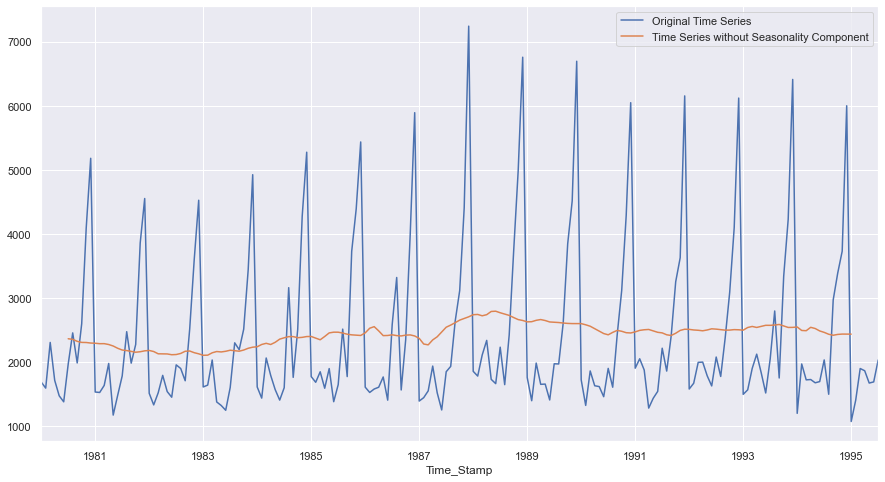

In [34]:
spark.plot(figsize=(15,8))
deaseasonalized_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

## 3. Split the data into training and test. The test data should start in 1991.

**The test data is selected starting from 1991.**


In [35]:
train = spark[spark.index.year < 1991]
test = spark[spark.index.year > 1990]

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031


In [37]:
print('Length of Train Data:', len(train))
print('Length of Test Data:', len(test))

Length of Train Data: 132
Length of Test Data: 55


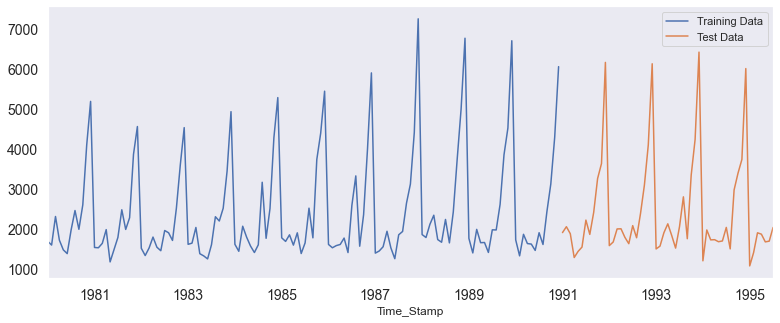

In [38]:
train['Sparkling'].plot(figsize=(13,5), fontsize=14)
test['Sparkling'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years

## Building different models and comparing the accuracy metrics.


# Model 1: Linear Regression

**Steps:**
* Generating a Linear numerical time instance order for both the training and test set and then adding it to the dataset.
* Build a Linear Regression Model.
* Predict the output and measure RMSE on Test Data.

In [39]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


* We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [40]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [41]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [42]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

### Plot-Linear regression

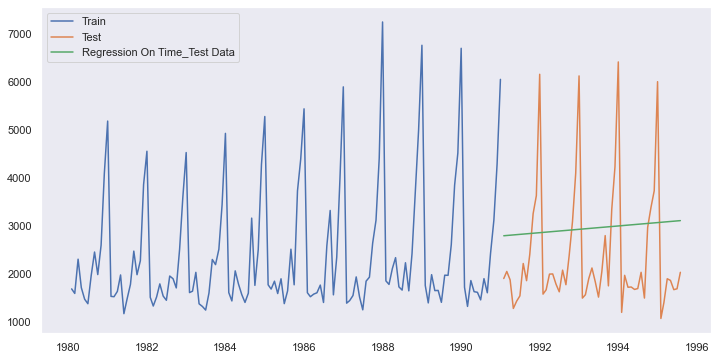

In [43]:
test_predictions_model1= lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1
plt.figure(figsize=(12,6))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

### Model Evaluation

In [44]:
rmse_model1_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [45]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['Regression On Time'])
resultsDf

,Test RMSE
Regression On Time,1389.135175


* The Linear Regression model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 1389.13  approximately.


## Model 2: Naive Approach: y^t+1=yt

**For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.**

In [46]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [47]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

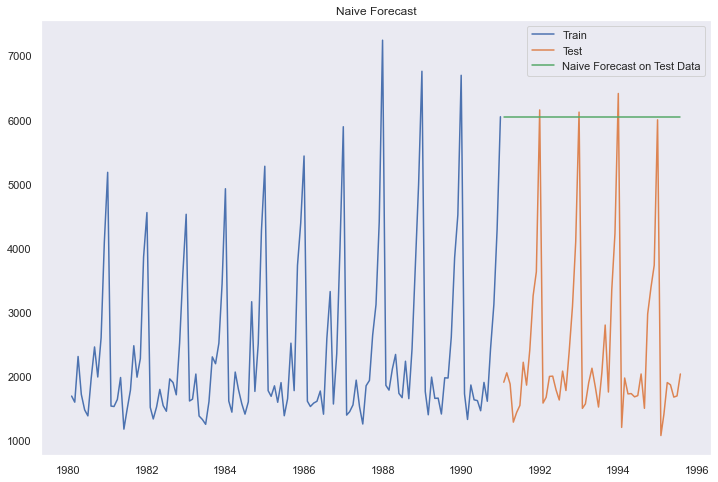

In [48]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

**Model Evaluation**

In [49]:
## Test Data - RMSE
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [50]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352


* The Naive model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 3864.27 approximately.


## Method 3: Simple Average
**For this particular simple average method, we will forecast by using the average of the training values.**

In [51]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [52]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

,Sparkling,mean_forecast
Time_Stamp,,
1991-01-31,1902,2403.780303
1991-02-28,2049,2403.780303
1991-03-31,1874,2403.780303
1991-04-30,1279,2403.780303
1991-05-31,1432,2403.780303


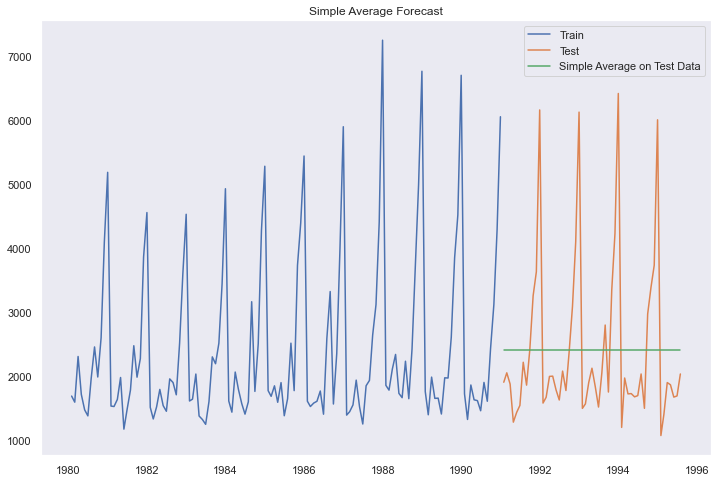

In [53]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

**Model Evaluation**

In [54]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [55]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804


* The Simple Average model is trained using the Train data and then the test values are predicted. The RMSE on the Test data is observed to be 1275.08 approximately.


## Method 4: Moving Average(MA)
**For the moving average model, we are going to calculate rolling means (or moving averages) for different intervals. The best interval can be determined by the maximum accuracy (or the minimum error) over here.
For Moving Average, we are going to average over the entire data.**

In [56]:
MovingAverage = spark.copy()
MovingAverage.head()

,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


**Trailing moving averages**

In [57]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()
MovingAverage.head()

,Sparkling,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1980-01-31,1686,NaN,NaN,NaN,NaN
1980-02-29,1591,1638.5,NaN,NaN,NaN
1980-03-31,2304,1947.5,NaN,NaN,NaN
1980-04-30,1712,2008.0,1823.25,NaN,NaN
1980-05-31,1471,1591.5,1769.50,NaN,NaN


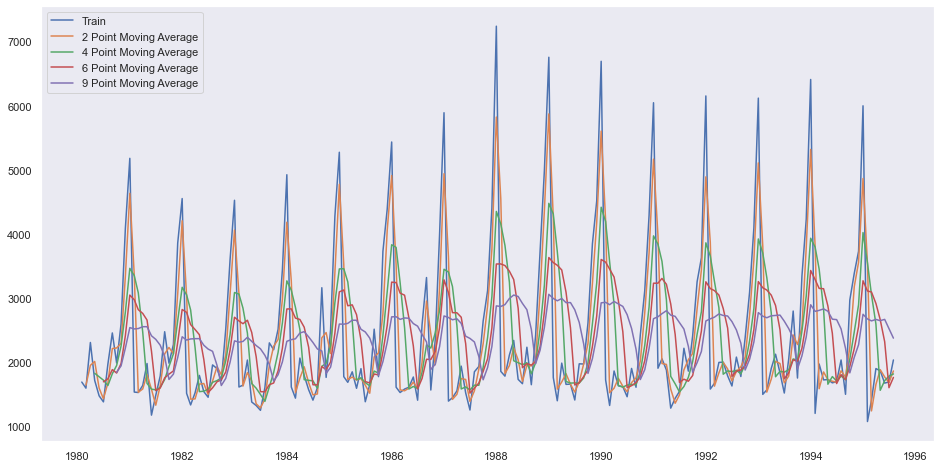

In [58]:
## Plotting on the whole data

plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

* Let us split the data into train and test and plot this Time Series. The window of the moving average is need to be carefully selected as too big a window will result in not having any test set as the whole series might get averaged over.

In [59]:
#Creating train and test set 
trailing_MovingAverage_train=MovingAverage[0:int(len(MovingAverage)*0.71)] 
trailing_MovingAverage_test=MovingAverage[int(len(MovingAverage)*0.71):]

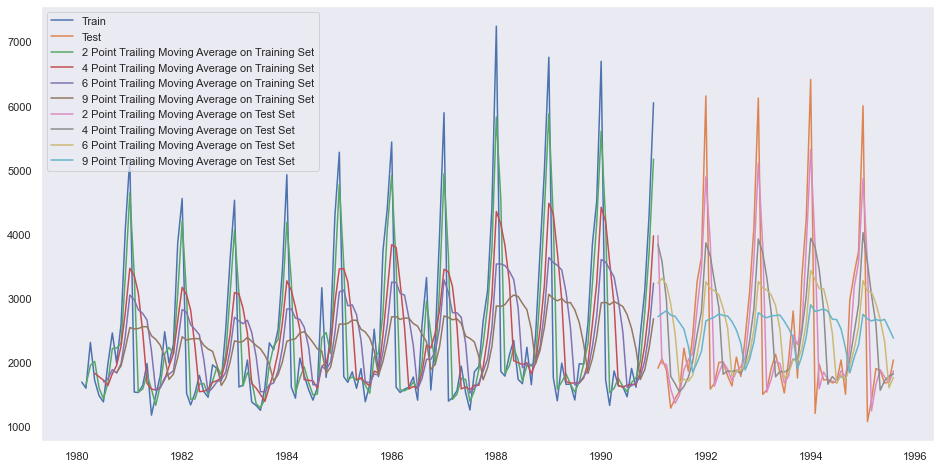

In [60]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

**Model Evaluation**

**Done only on the test data.**

In [61]:
## Test Data - RMSE  --> 2 point Trailing MA
rmse_model4_test_2 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data, RMSE is %3.3f" %(rmse_model4_test_2))

## Test Data - RMSE --> 4 point Trailing MA
rmse_model4_test_4 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))

## Test Data - RMSE --> 6 point Trailing MA
rmse_model4_test_6 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE --> 9 point Trailing MA
rmse_model4_test_9 = metrics.mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))
# Out of all 2 point moving average seems better. 

For 2 point Moving Average Model forecast on the Training Data, RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278


In [62]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf
     

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315


### Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

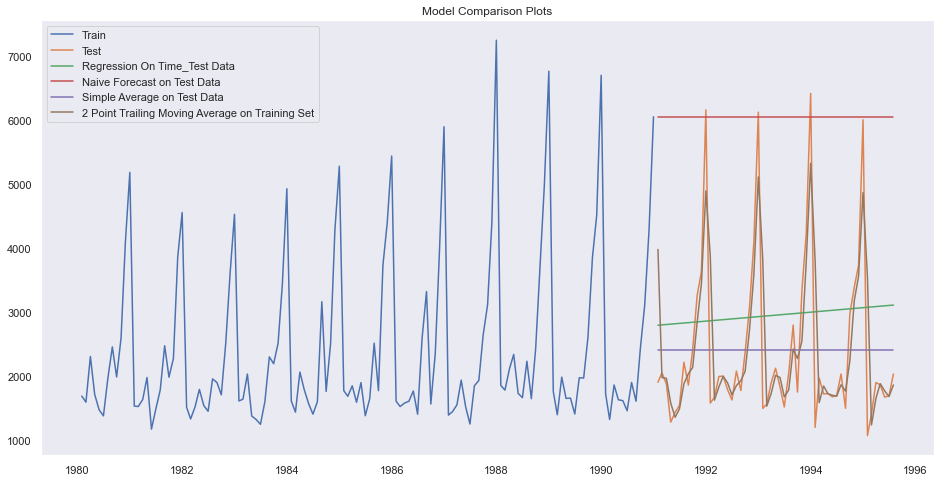

In [63]:
## Plotting on both Training and Test data
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.title("Model Comparison Plots")
plt.legend(loc='best')
plt.grid()
plt.show()

## 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

### Simple Exponential Smoothing

* The Simple Exponential Smoothing has the 'smoothing level' parameter  which is optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
* Build the Simple Exponential Smoothing model.
* Predict the output and measure RMSE on Test Data.

In [64]:
SES_train = train.copy()
SES_test = test.copy()

In [65]:
model_SES = SimpleExpSmoothing(SES_train['Sparkling'])

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


**Auto fit Model:**

In [66]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [67]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test['Sparkling']))
SES_test.head()

,Sparkling,predict
Time_Stamp,,
1991-01-31,1902,2724.929339
1991-02-28,2049,2724.929339
1991-03-31,1874,2724.929339
1991-04-30,1279,2724.929339
1991-05-31,1432,2724.929339


In [68]:
model_SES_autofit.params 

{'smoothing_level': 0.04960659884563118,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.5047543457245,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [69]:
alpha = model_SES_autofit.params['smoothing_level']
print(alpha)

0.04960659884563118


In [70]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2.head()

1991-01-31    2724.929339
1991-02-28    2724.929339
1991-03-31    2724.929339
1991-04-30    2724.929339
1991-05-31    2724.929339
Freq: M, dtype: float64

### Model Evaluation for α = 0.995 : Simple Exponential Smoothing

In [71]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1316.035


In [72]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.049:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674


* It is observed that for Single Exponential smoothing using the optimized method on Train data gives an RMSE value of 36.8 approximately for smoothing level  = 0.098.

**Adjusting various alpha levels.
More weight is placed on the most recent observation the higher the alpha value.
To discover which specific value for alpha on the test set performs best, we shall iteratively run a loop with several alpha values.**

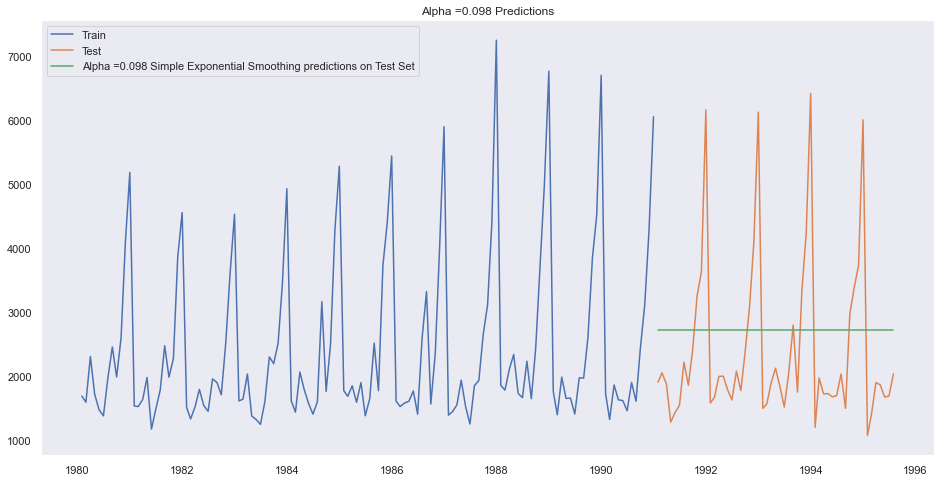

In [73]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model2, label='Alpha =0.098 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.098 Predictions');

* Setting different alpha values. Remember, the higher the alpha value more weightage is given to the more recent observation. That means, what happened recently will happen again. We will run a loop with different alpha values to understand which particular value works best for alpha on the test set

### Double Exponential Smoothing (Holt's Model)

* The Double Exponential Smoothing has two parameters 'smoothing level' (α) and 'smoothing_slope' (β) parameter which are optimized using inbuilt hyperparameter 'optimized' and also optimized iteratively based on Test RMSE values.
* Build the Double Exponential Smoothing model.
* Predict the output and measure RMSE on Test Data.

**Auto fit Model:**

In [74]:
DES_train = train.copy()
DES_test = test.copy()

In [75]:
model_DES = Holt(SES_train['Sparkling'])
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


**Auto fit Model:**

In [76]:
model_DES_autofit.params_formatted

,name,param,optimized
smoothing_level,alpha,0.688571,True
smoothing_trend,beta,0.000100,True
initial_level,l.0,1686.000000,True
initial_trend,b.0,-95.000000,True


In [77]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3.head()

1991-01-31    5221.278699
1991-02-28    5127.886554
1991-03-31    5034.494409
1991-04-30    4941.102264
1991-05-31    4847.710119
Freq: M, dtype: float64

In [78]:
alpha = model_DES_autofit.params['smoothing_level']
beta = model_DES_autofit.params['smoothing_trend']
print(alpha)
print(beta)

0.6885714285714285
9.999999999999999e-05


In [79]:
## Test Data - RMSE

rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 2007.239


In [80]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526


## Triple Exponential Smoothing model

**Triple Exponential Smoothing (Holt - Winter's Model)**

**Three parameters α, β and γ are estimated in this model. Level, Trend and Seasonality are accounted for in this model.**

In [81]:
TES_train = train.copy()
TES_test = test.copy()

In [82]:
model_TES = ExponentialSmoothing(SES_train['Sparkling'],trend='additive',seasonal='multiplicative')

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [83]:
model_TES_autofit = model_TES.fit(optimized=True)

**Auto Fit Model**

In [84]:
model_TES_autofit.params

{'smoothing_level': 0.11194572287706502,
 'smoothing_trend': 0.04979454913988668,
 'smoothing_seasonal': 0.3616765678435302,
 'damping_trend': nan,
 'initial_level': 2356.340229937152,
 'initial_trend': -10.519480221963526,
 'initial_seasons': array([0.71465118, 0.68302129, 0.90263858, 0.80589958, 0.65660325,
        0.65654363, 0.88525948, 1.132562  , 0.92225104, 1.21110112,
        1.8820382 , 2.38194187]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [85]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4.head()

1991-01-31    1586.782642
1991-02-28    1355.896477
1991-03-31    1762.095344
1991-04-30    1655.471900
1991-05-31    1541.320914
Freq: M, dtype: float64

In [86]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_trend']
gamma = model_TES_autofit.params['smoothing_seasonal']
print(alpha)
print(beta)
print(gamma)

0.11194572287706502
0.04979454913988668
0.3616765678435302


In [87]:
## Test Data - RMSE

rmse_model4_test = metrics.mean_squared_error(test['Sparkling'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 406.510


In [88]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


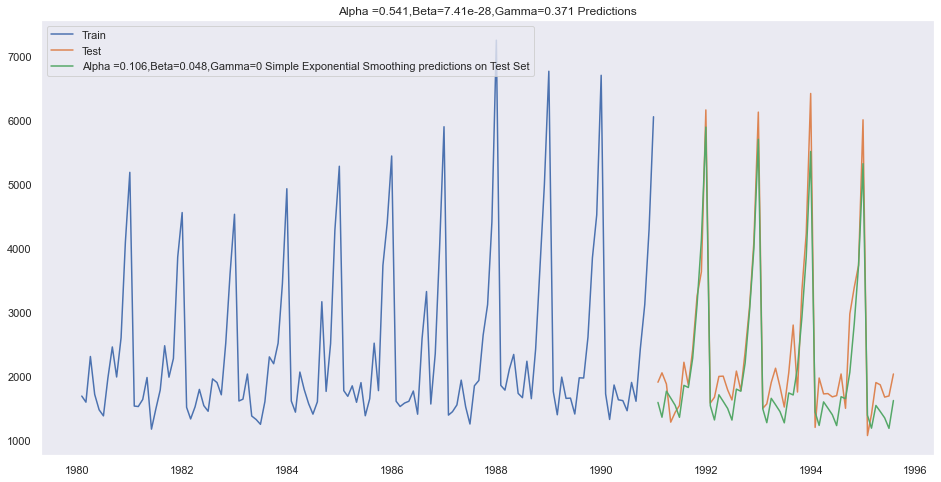

In [89]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(test_predictions_model4, label='Alpha =0.106,Beta=0.048,Gamma=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.541,Beta=7.41e-28,Gamma=0.371 Predictions');

### Finding exponential model that performs best


**Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.3 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.**



### Iterative Method for Simple Exponential Smoothing
Here we will set different alpha values.

In [90]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Train RMSE,Test RMSE


In [91]:
alpha_list = [0.025,0.05,0.25, 0.1, 0.2, 0.3, 0.5, 0.99]
for i in alpha_list:
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(len(test['Sparkling']))
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sparkling'],SES_train['predict',i],squared=False)
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sparkling'],SES_test['predict',i],squared=False)
    
    resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Test RMSE':rmse_SES_test_i}, ignore_index=True)

In [92]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.025,1322.084340,1286.248846
1,0.050,1318.429335,1316.411742
3,0.100,1333.873836,1375.393398
4,0.200,1356.042987,1595.206839
2,0.250,1359.701408,1755.488175
5,0.300,1359.511747,1935.507132
6,0.500,1344.004369,2666.351413
7,0.990,1371.044831,3847.548965


In [93]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][1]]}
                              ,index=['Alpha=0.025,SimpleExponentialSmoothing - Iter'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


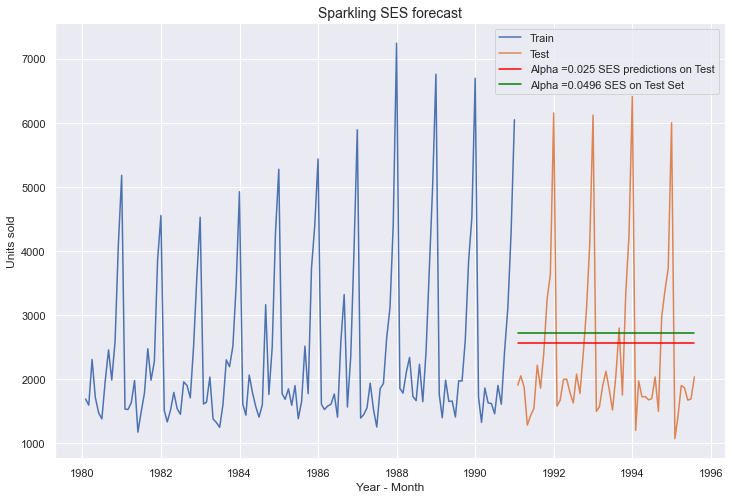

In [94]:
#plt.figure(figsize=(10,5))
plt.plot(SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')

plt.plot(SES_test['predict', 0.025], color = 'red', label='Alpha =0.025 SES predictions on Test')
plt.plot(SES_test['predict'], label='Alpha =0.0496 SES on Test Set',color = 'green')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Sparkling SES forecast', fontsize=14)
plt.legend(loc='best');

### Iterative Method for Double Exponential Smoothing

In [95]:
resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [96]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_trend=j,optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(len(test['Sparkling']))
        
        rmse_DES_train = np.round(metrics.mean_squared_error(DES_train['Sparkling'],DES_train['predict',i,j],squared=False),2)
        
        rmse_DES_test = np.round(metrics.mean_squared_error(DES_test['Sparkling'],DES_test['predict',i,j],squared=False),2)
        
        resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                          ,'Test RMSE':rmse_DES_test}, ignore_index=True)

In [97]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1382.52,1778.56
1,0.1,0.2,1413.60,2599.44
10,0.2,0.1,1418.04,3611.76
2,0.1,0.3,1445.76,4293.08
20,0.3,0.1,1431.17,5908.19
...,...,...,...,...
98,1.0,0.9,1985.37,57823.18
79,0.8,1.0,1872.71,57990.12
89,0.9,1.0,1948.02,59008.25
99,1.0,1.0,2077.67,59877.08


In [98]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][2]]}
                              ,index=['Alpha=0.1 & Beta=0.1,DoubleExponentialSmoothing-Iter'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


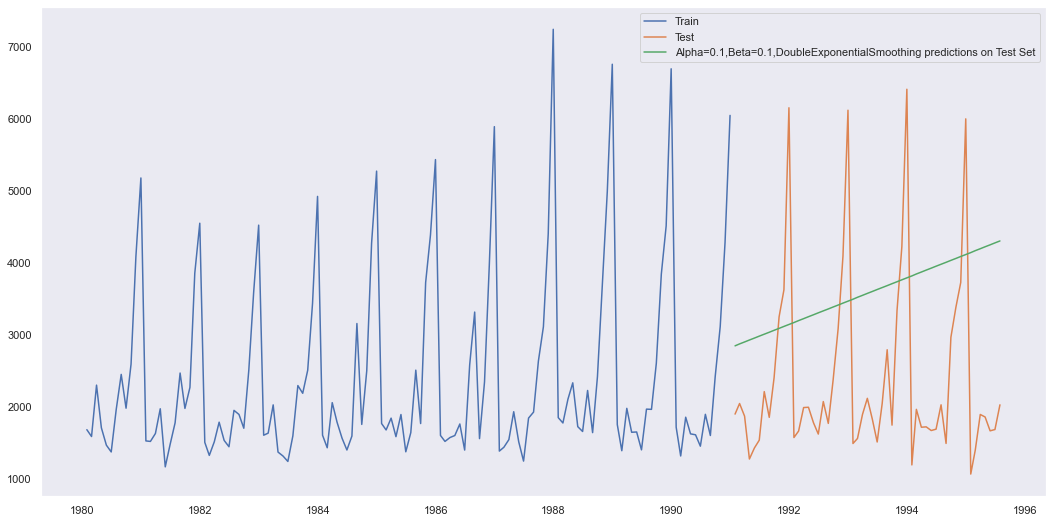

In [99]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(DES_train['Sparkling'], label='Train')
plt.plot(DES_test['Sparkling'], label='Test')
plt.plot(DES_test['predict',0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid();

**Iterative Method For Triple Exponential Smoothing**

In [100]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_model = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_model

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [101]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.3,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(len(test['Sparkling']))
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sparkling'],TES_train['predict',i,j,k],squared=False)
            
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sparkling'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_model = resultsDf_model.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_TES_train,'Test RMSE':rmse_TES_test}
                                                 , ignore_index=True)

In [102]:
resultsDf_model.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
320,0.5,0.1,0.3,3.965981e+02,3.459134e+02
176,0.3,0.3,0.3,3.977973e+02,3.613973e+02
321,0.5,0.1,0.4,4.053702e+02,3.652883e+02
109,0.2,0.4,0.8,5.131494e+02,3.683740e+02
240,0.4,0.1,0.3,3.828997e+02,3.767089e+02
...,...,...,...,...,...
678,0.9,0.5,0.9,6.346125e+03,7.893556e+06
796,1.0,1.0,0.7,2.660015e+05,8.649577e+06
629,0.8,0.9,0.8,1.894002e+06,9.023204e+06
762,1.0,0.6,0.5,5.298638e+03,1.016607e+07


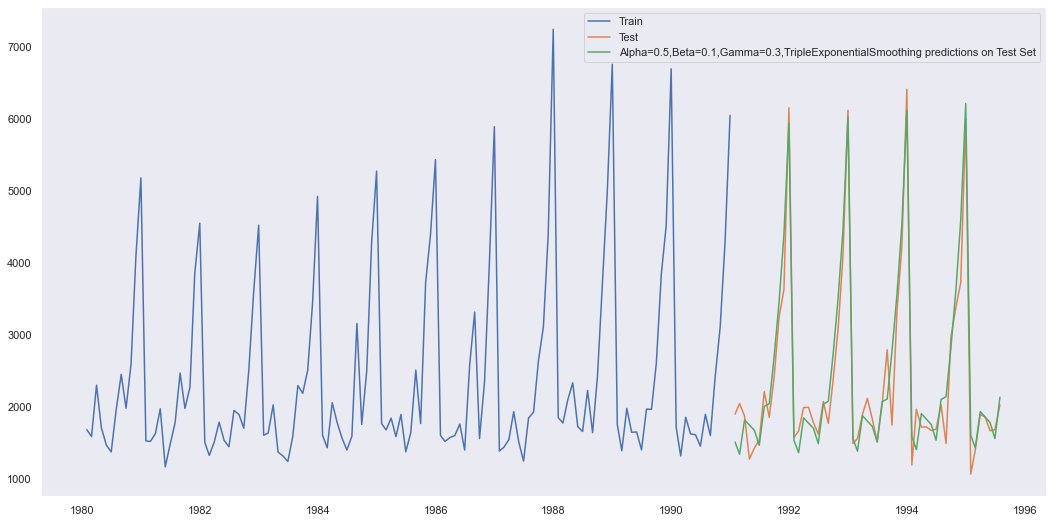

In [103]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sparkling'], label='Train')
plt.plot(TES_test['Sparkling'], label='Test')

#The value of alpha and beta is taken like that by python
plt.plot(TES_test['predict', 0.5,0.1, 0.3], label='Alpha=0.5,Beta=0.1,Gamma=0.3,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [104]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [resultsDf_model.sort_values(by=['Test RMSE'],ascending=True).values[0][3]]}
                              ,index=['Alpha=0.5,Beta=0.1,Gamma=0.3:TripleExponentialSmoothing-Iter'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

### Check for stationarity of the whole Time Series data


In [105]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

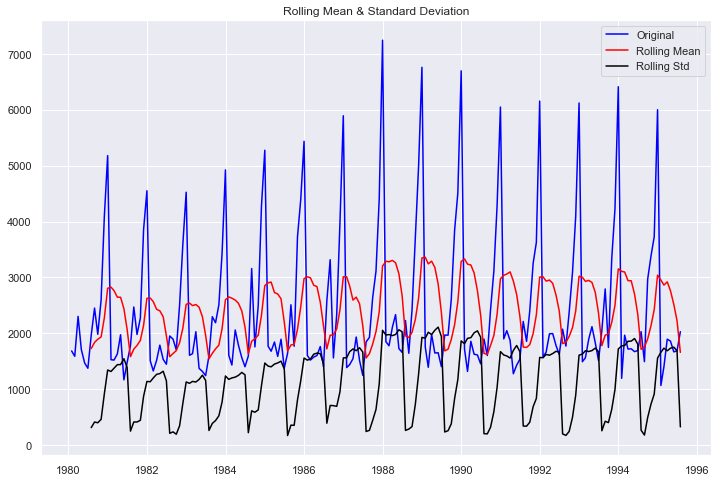

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [106]:
test_stationarity(spark['Sparkling'])

### Lets try check for stationarity after taking first order differencing


* Differencing method used to make the non-stationary time series of Rose wine to stationary



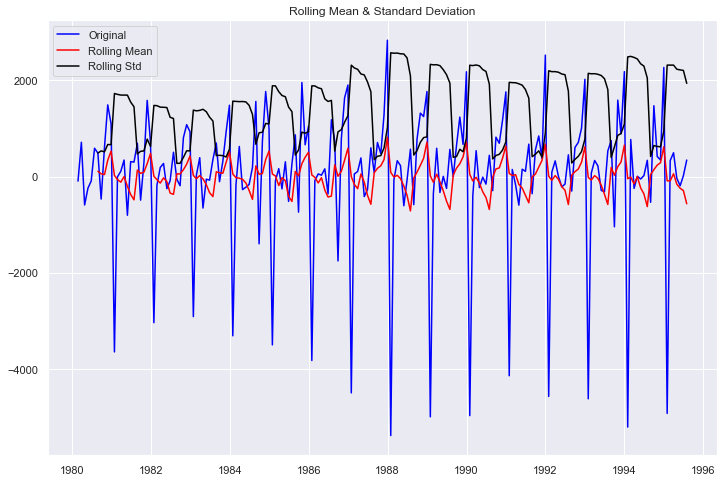

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [107]:
test_stationarity(spark['Sparkling'].diff().dropna())

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Auto -ARIMA Model(Using AIC )

* Series is not sationary and hence differencing would be required.For an Auto -Arima ,we calculate the best p and q parameters by looking at the lowest Akaike Information Criterion(AIC )values.

In [108]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [109]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [110]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323130674
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.7550946742404
ARIMA(1, 1, 2) - AIC:2234.527200452325
ARIMA(2, 1, 0) - AIC:2260.365743968097
ARIMA(2, 1, 1) - AIC:2233.7776262581274
ARIMA(2, 1, 2) - AIC:2213.5092126110794


In [111]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
8,"(2, 1, 2)",2213.509213
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.5272
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


* ARIMA (2,1,2) has a lowest AIC values

### Summary of Auto-ARIMA (0,1,2)

In [112]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(2,1,2),freq=train.index.inferred_freq)

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Dec 2022   AIC                           2213.509
Time:                        10:56:56   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.214      0.0

In [113]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [114]:
predicted_auto_ARIMA.head()

1991-01-31    4252.342838
1991-02-28    2863.083884
1991-03-31    2043.969041
1991-04-30    1746.206779
1991-05-31    1813.636345
Freq: M, Name: predicted_mean, dtype: float64

### Auto ARIMA(2,1,2) using AIC plot

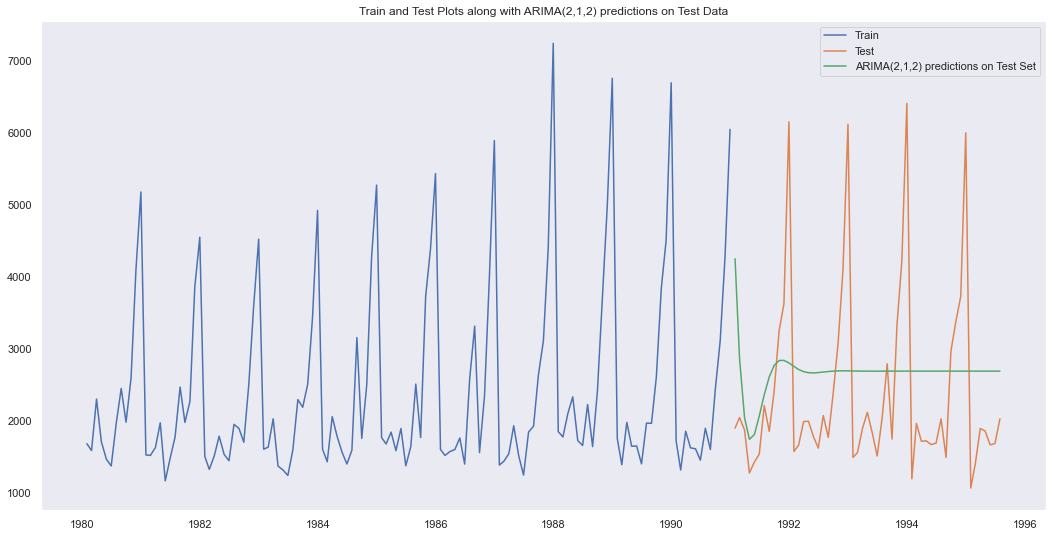

In [115]:
plt.figure(figsize=(18,9))
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(predicted_auto_ARIMA, label='ARIMA(2,1,2) predictions on Test Set')
plt.title('Train and Test Plots along with ARIMA(2,1,2) predictions on Test Data')         
         
plt.legend(loc='best')
plt.grid();

Inferences:

Since the series has seasonality, we observe that the ARIMA model build on it is not appropriate and we need to build a SARIMA model and derive the p,q parameters from the acf and pacf plots after considering the seasonal difference as well.

In [116]:
rmse = np.sqrt(mean_squared_error(test['Sparkling'],predicted_auto_ARIMA))
print("Auto - ARIMA Model forecast on the Test Data,  RMSE is %3.3f" %rmse)

Auto - ARIMA Model forecast on the Test Data,  RMSE is 1299.980


In [117]:
resultsDf_a = pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['ARIMA(2,1,2) Best AIC'])

resultsDf = pd.concat([resultsDf, resultsDf_a])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


### Seasonal Difference:

### Automated Sarima Model (Using AIC)

As the data has seasonality .Lets build the model with SARIMA.For an Auto-SARIMA ,the parameters pdq and PDQ are selected based on lowest Akaike Information Criterion (AIC)values

Setting the seasonality as 12 for the first iteration of the auto SARIMA mode

In [118]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [119]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [120]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616843673
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640236705
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388897
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791933
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609953
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920738
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.162907850583
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566396
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089573117426
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838295
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193762963
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144497718
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954175527
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245085138572
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.401882352987
SARIMA(0, 1,

* Top 5 best AIC values for Auto -Sarima Model

In [121]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
50,"(1, 1, 2)","(1, 0, 2, 12)",1555.584247
53,"(1, 1, 2)","(2, 0, 2, 12)",1555.934565
26,"(0, 1, 2)","(2, 0, 2, 12)",1557.121599
23,"(0, 1, 2)","(1, 0, 2, 12)",1557.160507
77,"(2, 1, 2)","(1, 0, 2, 12)",1557.340405


* Lowest AIC value for SARIMA is (1, 1, 2)(1, 0, 2, 12)

### Summary of Sarimax

In [122]:
auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -769.967
Date:                            Sun, 25 Dec 2022   AIC                           1555.935
Time:                                    10:57:45   BIC                           1577.090
Sample:                                         0   HQIC                          1564.505
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6382      0.287     -2.226      0.026      -1.200      -0.076
ma.L1         -0.3049      0.185   

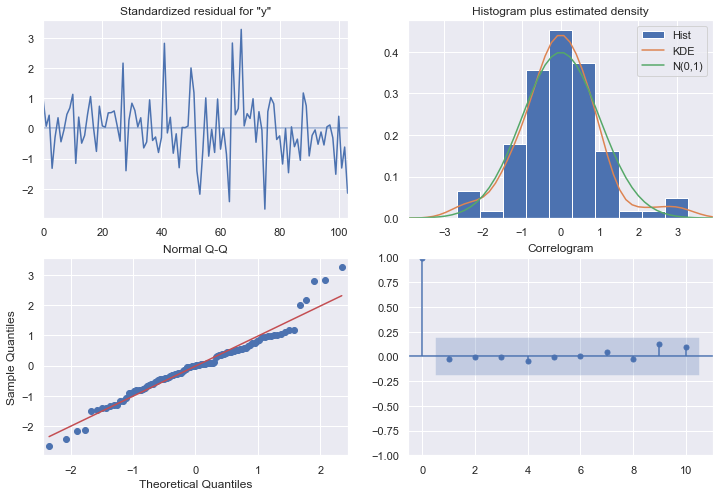

In [123]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Inferences:
It is observed from above that Residual is nearly Standard Normally distributed and Correlogram shows that there is no correlation in the residuals. Both this suggests that the SARIMA model captures the information and is a good enough model.

### Predict on the Test Set using this model and evaluate the model.

In [124]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [125]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1317.741071,390.277933,552.810378,2082.671764
1,1309.713102,403.644019,518.585362,2100.840842
2,1608.742938,403.656292,817.591142,2399.894733
3,1599.862864,409.160885,797.922265,2401.803463
4,1378.167019,410.012621,574.557049,2181.776989


In [126]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

546.5826167356053


In [127]:
temp_resultsDf_auto_SARIMA= pd.DataFrame({'Test RMSE': [rmse]}
                           ,index=['SARIMA(1, 1, 2)(2, 0, 2, 12) Best AIC'])


resultsDf = pd.concat([resultsDf,temp_resultsDf_auto_SARIMA])

resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


### Model Plot for SARIMA

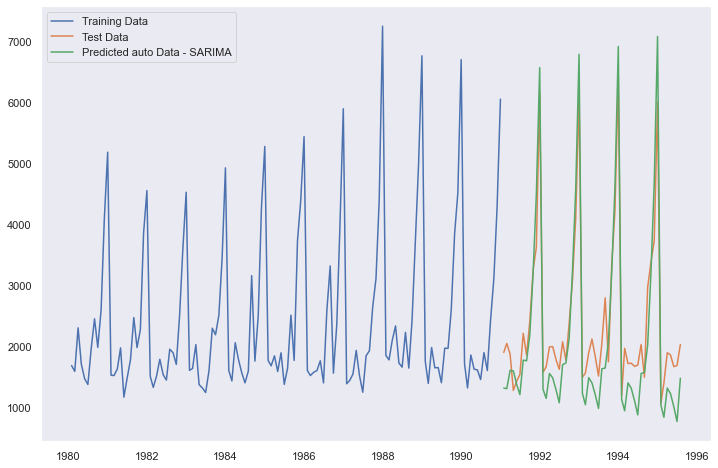

In [128]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted auto Data - SARIMA')
plt.legend(loc='best')
plt.grid();

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### ACF & PACF Plots

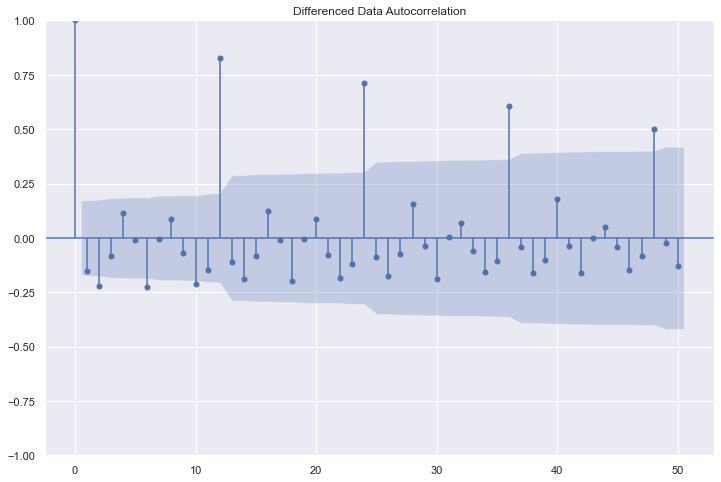

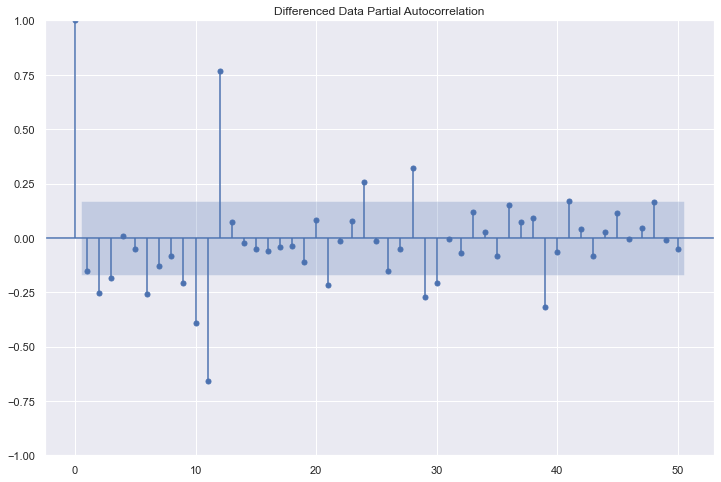

In [129]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [130]:
manual_ARIMA = ARIMA(train['Sparkling'].astype('float64'), order=(2,1,2))
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\msair\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 25 Dec 2022   AIC                           2213.509
Time:                        10:57:47   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.214      0.0

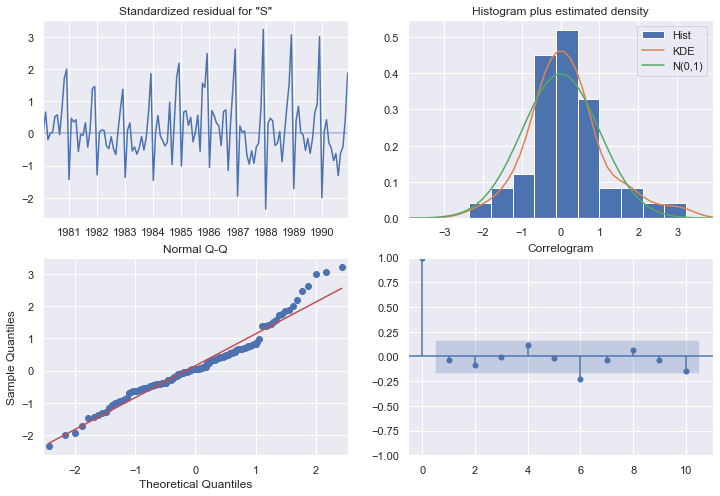

In [131]:
results_manual_ARIMA.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model and evaluate the model.**

In [132]:
predict_test = results_manual_ARIMA.predict(start='1991-01-01',end='1995-07-01',typ='levels')

In [133]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test['Sparkling']))

### Predict on the Test Set using Manual Arima model and evaluate the model


In [134]:
rmse_Manual_arima = np.sqrt(mean_squared_error(test,predict_test))
print("ARIMA Model forecast on the Test Data,  RMSE is %3.3f" %rmse_Manual_arima)

ARIMA Model forecast on the Test Data,  RMSE is 1299.980


### Manual ARIMA Model Evaluation

In [135]:
manual_ARIMA_results = pd.DataFrame({'Test RMSE': [rmse_Manual_arima]}
                           ,index=['Manual Arima(0, 1, 1)*(1, 0, 1, 12)'])

resultsDf = pd.concat([resultsDf, manual_ARIMA_results])
resultsDf

,Test RMSE
Regression On Time,1389.135175
Naive Model,3864.279352
Simple Average Model,1275.081804
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
6pointTrailingMovingAverage,1283.927428
9pointTrailingMovingAverage,1346.278315
Alpha=0.049:SimpleExponentialSmoothing,1316.034674
"Alpha=0.68,Beta=9.99:DoubleExponentialSmoothing",2007.238526
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170


### Sarima model by picking p,d,q & P,D ,Q values from ACF and PACF plot

### Model-10 Manual SARIMA

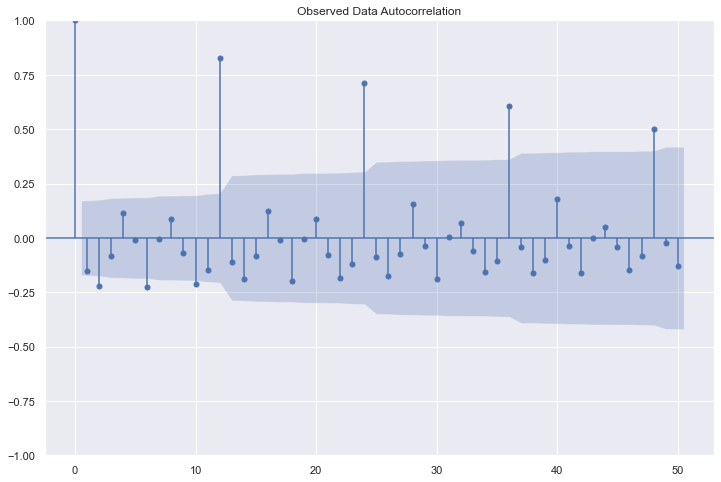

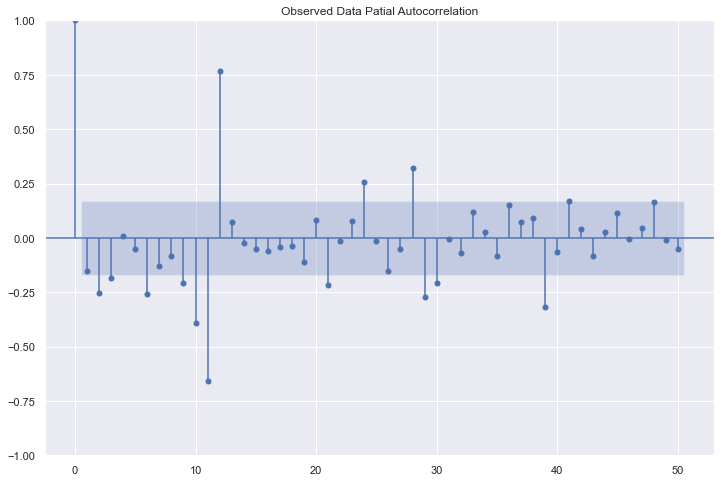

In [136]:
plot_acf(train['Sparkling'].diff().dropna(),lags=50,title='Observed Data Autocorrelation')
plot_pacf(train['Sparkling'].diff().dropna(),lags=50,title='Observed Data Patial Autocorrelation')
plt.show()

In [137]:
manual_SARIMA= sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -693.697
Date:                                 Sun, 25 Dec 2022   AIC                           1403.394
Time:                                         10:57:50   BIC                           1423.654
Sample:                                              0   HQIC                          1411.574
                                                 - 132                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2229      0.130      1.713      0.087      -0.032       0

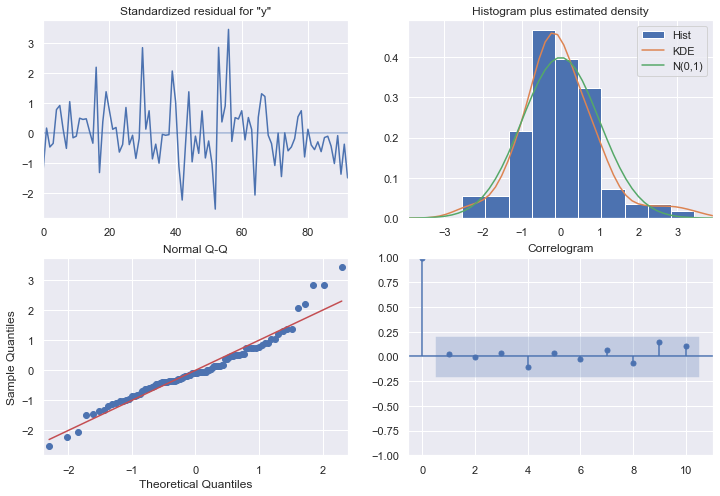

In [138]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

**Predict on the Test Set using this model and evaluate the model.**

In [139]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test['Sparkling']))

In [140]:
predicted_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1579.905118,416.593896,763.396087,2396.414150
1,1419.145975,429.113100,578.099753,2260.192197
2,1868.134729,429.103744,1027.106846,2709.162612
3,1731.464078,430.972627,886.773251,2576.154905
4,1659.814085,431.905706,813.294457,2506.333714


In [141]:
manual_spark_forecasted = predicted_manual_SARIMA.predicted_mean
test['manual_spark_forecasted'] = predicted_manual_SARIMA.predicted_mean
test.head()

,Sparkling,manual_spark_forecasted
Time_Stamp,,
1991-01-31,1902,1579.905118
1991-02-28,2049,1419.145975
1991-03-31,1874,1868.134729
1991-04-30,1279,1731.464078
1991-05-31,1432,1659.814085


### SARIMA model by picking pdq and PDQ from ACF and PACF plots.

In [142]:
rmse_SARIMA_manual_model = metrics.mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
print("For Manual-SARIMA Model forecast on the Test Data, RMSE is %3.3f" %(rmse_SARIMA_manual_model))

For Manual-SARIMA Model forecast on the Test Data, RMSE is 324.104


In [157]:
temp_results_Sarima_12 = pd.DataFrame({'Test RMSE': [rmse_SARIMA_manual_model]}
                           ,index=['Manual SARIMA  '] )


resultsDf = pd.concat([resultsDf,temp_results_Sarima_12])

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [144]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
Manual SARIMA,324.104155
"Alpha=0.5,Beta=0.1,Gamma=0.3:TripleExponentialSmoothing-Iter",396.598057
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170
"SARIMA(1, 1, 2)(2, 0, 2, 12) Best AIC",546.582617
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
Simple Average Model,1275.081804
6pointTrailingMovingAverage,1283.927428
"Manual Arima(0, 1, 1)*(1, 0, 1, 12)",1299.979524
"ARIMA(2,1,2) Best AIC",1299.979524


## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Build model on the entire dataset using best optimum model:
**which is Manual_SARIMA(3,1,1)(1,1,2,12) or Auto_SARIMA_log(0, 1, 1)(1, 0, 1, 12)**

In [145]:
resultsDf.sort_values(by=['Test RMSE'])

,Test RMSE
Manual SARIMA,324.104155
"Alpha=0.5,Beta=0.1,Gamma=0.3:TripleExponentialSmoothing-Iter",396.598057
"Alpha=0.11,Beta=0.04,Gamma=0.36:TripleExponentialSmoothing",406.510170
"SARIMA(1, 1, 2)(2, 0, 2, 12) Best AIC",546.582617
2pointTrailingMovingAverage,813.400684
4pointTrailingMovingAverage,1156.589694
Simple Average Model,1275.081804
6pointTrailingMovingAverage,1283.927428
"Manual Arima(0, 1, 1)*(1, 0, 1, 12)",1299.979524
"ARIMA(2,1,2) Best AIC",1299.979524


### Build model on the entire dataset using best optimum model:

In [146]:
manual_SARIMA_spark_Full = sm.tsa.statespace.SARIMAX(spark['Sparkling'].values,
                                order=(3, 1, 1),
                                seasonal_order= (1, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_spark_Full = manual_SARIMA_spark_Full.fit(maxiter=1000)
print(results_manual_SARIMA_spark_Full.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  187
Model:             SARIMAX(3, 1, 1)x(1, 1, [1, 2], 12)   Log Likelihood               -1094.342
Date:                                 Sun, 25 Dec 2022   AIC                           2204.685
Time:                                         10:57:53   BIC                           2228.662
Sample:                                              0   HQIC                          2214.427
                                                 - 187                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1159      0.086      1.349      0.177      -0.052       0

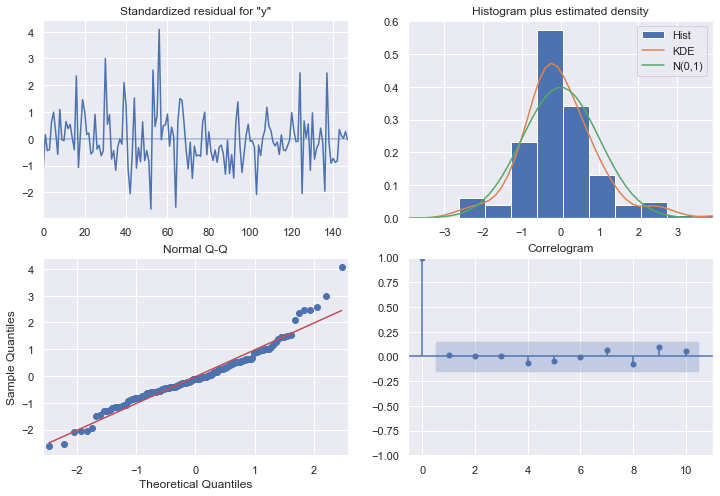

In [147]:
results_manual_SARIMA_spark_Full.plot_diagnostics()
plt.show()

**Forecast for the next 12 months using this model.**


In [161]:
prediction = results_manual_SARIMA_spark_Full.forecast(steps=12)

In [148]:
Forecast_manual_SARIMA = results_manual_SARIMA_spark_Full.get_forecast(steps=12)

In [149]:
rmse_spark_Full = metrics.mean_squared_error(spark['Sparkling'],results_manual_SARIMA_spark_Full.fittedvalues,squared=False)
print("For Manual-SARIMA Model forecast on the Entire Data, RMSE is %3.3f" %(rmse_spark_Full))

For Manual-SARIMA Model forecast on the Entire Data, RMSE is 547.591


In [150]:
Forecast_manual_SARIMA.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,1870.888549,390.915204,1104.708828,2637.068269
1,2489.623627,395.293861,1714.861895,3264.385358
2,3299.650018,395.322890,2524.831391,4074.468645
3,3934.056590,396.282382,3157.357393,4710.755787
4,6135.396016,396.768731,5357.743592,6913.048440


In [151]:
Forecast_manual_SARIMA_date = Forecast_manual_SARIMA.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-07-31', freq='M'))

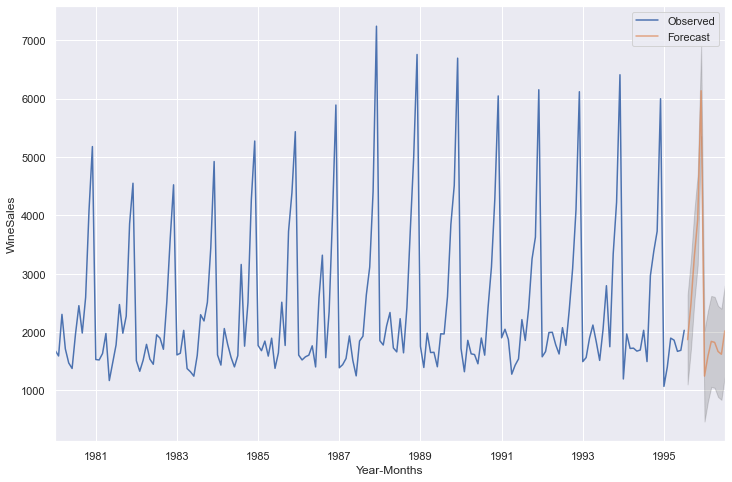

In [152]:
axis = spark['Sparkling'].plot(label='Observed')
Forecast_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(Forecast_manual_SARIMA_date.index, Forecast_manual_SARIMA_date['mean_ci_lower'], 
                  Forecast_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('WineSales')
plt.legend(loc='best')
plt.show()

## 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

In [153]:
Forecast_manual_SARIMA_date['mean'].sum()

29534.252171800752

In [154]:
Forecast_manual_SARIMA_date['mean'].describe()

count      12.000000
mean     2461.187681
std      1391.118211
min      1245.727158
25%      1656.647687
50%      1855.796898
75%      2692.130224
max      6135.396016
Name: mean, dtype: float64

In [155]:
Forecast_manual_SARIMA_date['mean']

1995-08-31    1870.888549
1995-09-30    2489.623627
1995-10-31    3299.650018
1995-11-30    3934.056590
1995-12-31    6135.396016
1996-01-31    1245.727158
1996-02-29    1584.643735
1996-03-31    1840.705248
1996-04-30    1823.847820
1996-05-31    1668.706089
1996-06-30    1620.472484
1996-07-31    2020.534839
Freq: M, Name: mean, dtype: float64

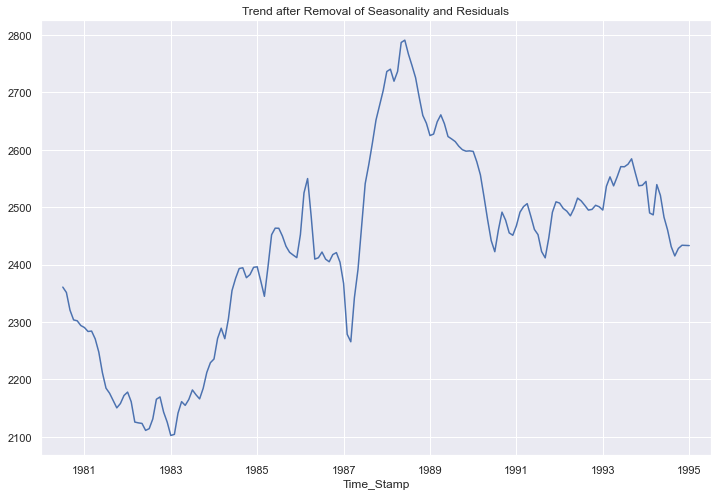

In [156]:
decomposition_m.trend.plot()
plt.title('Trend after Removal of Seasonality and Residuals');